![](https://i.imgur.com/Fhk1EFo.png)

**Letra a)**

Pela lei de kirchoff das correntes nos nós sabemos que

\\[
0 = i_{C}(0^{+}) + i_{L}(0^{+}) + i_{R}(0^{+})
\\]

Temos: 

\\(i_{L}(0^{+}) = 30mA\\)

\\(i_{R}(0^{+}) = \frac{v(0^{+})}{R} = \frac{12}{200} = 60mA\\)

Assim, 

\\(i_{C}(0^{+}) = -30 mA - 60mA = -90mA\\)

In [16]:
import numpy as np
from IPython.display import display, Markdown, Latex

C = 0.2e-6
iC_0 = -90e-3
dv_0dt = iC_0 / C

md ='''
**Letra b)**

O valor inicial de \\\\(\\frac{{dv(0^{{+}})}}{{dt}}\\\\) é:

\\\\[
    \\frac{{i_{{C}}(0^{{+}})}}{{C}} = \\frac{{{iC_0}}}{{{C}}} = {{{dv_0dt} V}}
\\\\]
'''.format(iC_0 = iC_0, C = C, dv_0dt = dv_0dt)

display(Markdown(md))


**Letra b)**

O valor inicial de \\(\frac{dv(0^{+})}{dt}\\) é:

\\[
    \frac{i_{C}(0^{+})}{C} = \frac{-0.09}{2e-07} = {-450000.0 V}
\\]


In [37]:
alpha = lambda R, C: np.round(1/(2*R*C))
omega_0 = lambda L, C: np.round(1/np.sqrt(L*C))
s_1 = lambda R, L, C: np.round(
    -alpha(R,C) + np.sqrt(
        np.power(alpha(R,C), 2) - np.power(omega_0(L,C), 2) + 0j
    )
)
s_2 = lambda R, L, C: np.round(
    -alpha(R,C) - np.sqrt(
        np.power(alpha(R,C), 2) - np.power(omega_0(L,C), 2) + 0j
    )
)
R, L, C = 200, 50e-3, 0.2e-6
v_0 = 12
S_1, S_2 = np.array([s_1(R, L, C), s_2(R, L, C)])
coeficientes = np.array([
    [1,     1],
    [S_1, S_2]
])
termos_independentes = np.array([
    [v_0],
    [dv_0dt]
])
A_1, A_2 = np.linalg.solve(coeficientes, termos_independentes).ravel()

md = '''
**Letra c)**

Determine a expressão para v(t).

\\\\[
    v(t) = ({{{A_1}}} e^{{{S_1} t}} + {{{A_2}}} e^{{{S_2} t}}) V, t \geq 0
\\\\]
'''.format(A_1 = int(A_1.real), A_2 = int(A_2.real), S_1 = int(S_1.real), S_2 = int(S_2.real))
display(Markdown(md))


**Letra c)**

Determine a expressão para v(t).

\\[
    v(t) = ({-14} e^{-5000 t} + {26} e^{-20000 t}) V, t \geq 0
\\]



**Letra d)**

Faça um gráfico de \\(v(t)\\) no intervalo \\(0 \leq t \leq 250ms \\)


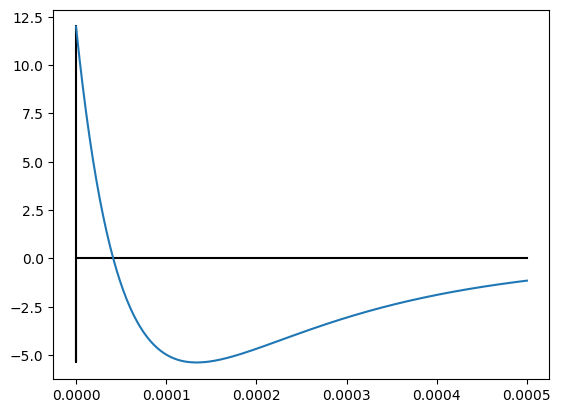

In [51]:
from matplotlib import pyplot as plt

v = lambda t: A_1 * np.exp(S_1 * t) + A_2 * np.exp(S_2 * t)
timeinterval = np.linspace(0, 500e-6, 401)
V = np.vectorize(v)(timeinterval)

md = '''
**Letra d)**

Faça um gráfico de \\\\(v(t)\\\\) no intervalo \\\\(0 \\leq t \\leq 250ms \\\\)
'''

display(Markdown(md))
# eixo y
plt.plot(np.zeros(len(timeinterval)), V, 'k')
# eixo x
plt.plot(timeinterval, np.zeros(len(timeinterval)), 'k')
plt.plot(timeinterval, V)
plt.show()